In [117]:
# Loading all libraries 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from matplotlib.colors import ListedColormap
import seaborn as sns
import math
pd.options.display.float_format = '{:,.2f}'.format
sns.set_style("whitegrid")
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [118]:
# Loading datasets 
df = pd.read_csv('./Data for Cleaning & Modeling.csv')
test_df = pd.read_csv('./Holdout for Testing.csv')

In [119]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      0 non-null      float64
 1   X2      80000 non-null  int64  
 2   X3      80000 non-null  int64  
 3   X4      80000 non-null  object 
 4   X5      80000 non-null  object 
 5   X6      80000 non-null  object 
 6   X7      80000 non-null  object 
 7   X8      80000 non-null  object 
 8   X9      80000 non-null  object 
 9   X10     75606 non-null  object 
 10  X11     75618 non-null  object 
 11  X12     80000 non-null  object 
 12  X13     80000 non-null  float64
 13  X14     80000 non-null  object 
 14  X15     80000 non-null  object 
 15  X16     15 non-null     object 
 16  X17     80000 non-null  object 
 17  X18     80000 non-null  object 
 18  X19     80000 non-null  object 
 19  X20     80000 non-null  object 
 20  X21     80000 non-null  float64
 21  X22     80000 non-null  int64  
 22

In [120]:
df.head(50)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,"54,734.00","80,364.00","$25,000","$25,000","$19,080",36 months,B,B4,NaN,< 1 year,RENT,"85,000.00",VERIFIED - income,Aug-09,Due to a lack of personal finance education an...,debt_consolidation,Debt consolidation for on-time payer,941xx,CA,19.48,0.00,Feb-94,0.00,NaN,NaN,10.00,0.00,"28,854.00",52.10%,42.00,f
1,10.71%,"55,742.00","114,426.00","$7,000","$7,000",$673,36 months,B,B5,CNN,< 1 year,RENT,"65,000.00",not verified,May-08,Just want to pay off the last bit of credit ca...,credit_card,Credit Card payoff,112xx,NY,14.29,0.00,Oct-00,0.00,NaN,NaN,7.00,0.00,"33,623.00",76.70%,7.00,f
2,16.99%,"57,167.00","137,225.00","$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,1 year,RENT,"70,000.00",VERIFIED - income,Aug-14,Trying to pay a friend back for apartment brok...,debt_consolidation,mlue,100xx,NY,10.50,0.00,Jun-00,0.00,41.00,NaN,10.00,0.00,"19,878.00",66.30%,17.00,f
3,13.11%,"57,245.00","138,150.00","$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,10+ years,OWN,"54,000.00",not verified,Mar-10,"If funded, I would use this loan consolidate t...",debt_consolidation,zxcvb,777xx,TX,5.47,0.00,Jan-85,0.00,64.00,NaN,5.00,0.00,"2,584.00",40.40%,31.00,f
4,13.57%,"57,416.00","139,635.00","$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,6 years,RENT,"32,000.00",not verified,Nov-09,I currently have a personal loan with Citifina...,debt_consolidation,Nicolechr1978,067xx,CT,11.63,0.00,Dec-96,1.00,58.00,NaN,14.00,0.00,"3,511.00",25.60%,40.00,f
5,19.05%,"58,524.00","149,512.00","$7,200","$7,200","$7,200",36 months,D,D4,Arkwright,9 years,RENT,"58,000.00",VERIFIED - income source,Aug-12,"Credit cards are out of here, I am tired of be...",debt_consolidation,caminijio,028xx,RI,2.05,0.00,Apr-94,0.00,26.00,NaN,6.00,0.00,"3,874.00",90.10%,25.00,f
6,10.08%,"58,915.00","153,417.00","$7,500","$5,025",$557,36 months,B,B3,QUalcomm Inc,3 years,RENT,"85,000.00",not verified,Apr-08,Hi : Thanks for stopping by. I've accr...,debt_consolidation,sdguy,921xx,CA,8.10,0.00,Nov-00,1.00,NaN,NaN,3.00,0.00,"33,667.00",73.20%,11.00,f
7,14.26%,"59,006.00","154,254.00","$3,000","$3,000","$2,988",36 months,C,C5,NaN,3 years,MORTGAGE,"80,800.00",not verified,Sep-09,I am seeking to refinance a credit account whi...,credit_card,Rejecting new cardmember agreement,775xx,TX,14.97,1.00,Jul-98,0.00,13.00,0.00,13.00,0.00,"4,740.00",39.50%,23.00,f
8,7.88%,"61,390.00","182,594.00","$4,000","$4,000","$3,900",36 months,A,A5,NaN,< 1 year,MORTGAGE,"148,000.00",not verified,Feb-10,I am searching for a lower rate. I am very tr...,credit_card,ilikehorses,775xx,TX,16.98,0.00,May-93,0.00,NaN,NaN,11.00,0.00,"50,807.00",51%,19.00,f
9,14.96%,"61,419.00","182,917.00","$5,600","$5,600","$5,525",36 months,D,D2,Pension Benefit Guaranty Corporation,1 year,RENT,"45,000.00",not verified,Feb-10,This loan is for the purpose of gaining legal ...,debt_consolidation,Athomas74,208xx,MD,4.00,0.00,Jun-01,0.00,38.00,63.00,5.00,1.00,"3,839.00",76.80%,9.00,f


In [121]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32'], dtype='object')

In [122]:
df.isna().sum()

X1      61010
X2          1
X3          1
X4          1
X5          1
X6          1
X7          1
X8      61270
X9      61270
X10     23986
X11     17538
X12     61361
X13     61028
X14         1
X15         1
X16    276440
X17         1
X18        19
X19         1
X20         1
X21         1
X22         1
X23         1
X24         1
X25    218802
X26    348845
X27         1
X28         1
X29         1
X30       267
X31         1
X32         1
dtype: int64

In [123]:
pd.isna(df['X1']).value_counts()

False    338990
True      61010
Name: X1, dtype: int64

In [124]:
def eda_categorical(data, variable, ax=None):
    variable_df = data[variable].value_counts(normalize=True).reset_index()
    n_colors = len(variable_df)
    variable_df.set_index('index').T.plot(kind='barh',
                                        stacked=True,
                                        colormap=ListedColormap(sns.color_palette("Set2", n_colors)),
                                        width=0.15, ax=ax)

def multiple_eda_categorical(data, list_categorical):
    n_rows = math.ceil(len(list_categorical)/2)
    fig = plt.figure(figsize=(12,n_rows*3))

    for i, variable in enumerate(list_categorical):
        ax = fig.add_subplot(n_rows,2,i+1)
        eda_categorical(data, variable, ax=ax)
    
    plt.tight_layout()
    plt.show()

def multiple_eda_continuous(data, list_continuous):
    n_rows = math.ceil(len(list_continuous)/4)
    fig = plt.figure(figsize=(12,n_rows*5))
    palette = sns.color_palette('Set2', len(list_continuous))

    for i, variable in enumerate(list_continuous):
        ax = fig.add_subplot(n_rows,4,i+1)
        sns.boxplot(x=variable, data=data, orient='v', palette=[palette[i]], ax=ax)
        ax.set_ylabel('')
        ax.set_title(variable)

    plt.tight_layout()
    plt.show()

In [125]:
test_df = test_df.drop(['X10','X16','X25', 'X26','X2','X3','X18','X20','X15','X23'], axis=1)
df = df.drop(['X10','X16','X25', 'X26','X2','X3','X18','X20','X15','X23'], axis=1)

In [126]:
# Dropping rows 
# Dropped rows from X1 which do not have any value since X1 is the target variable
# Dropped rows from X3 which do not have any value since we cannot impute annual income
# Dropped rows from X30 which are null since the number of rows missing is very less
df = df[df['X1'].isna() == False]
df = df[df['X13'].isna() == False]
df = df[df['X30'].isna() == False]

# Removing $ and % signs and converting it to float 
df['X1'] = df['X1'].str.rstrip('%').astype('float')
df['X30'] = df['X30'].str.rstrip('%').astype('float')
df['X4'] = df['X4'].str.replace(',', '').str.replace('$', '').astype(float)
df['X5'] = df['X5'].str.replace(',', '').str.replace('$', '').astype(float)
df['X6'] = df['X6'].str.replace(',', '').str.replace('$', '').astype(float)

test_df['X30'] = test_df['X30'].str.rstrip('%').astype('float')
test_df['X4'] = test_df['X4'].str.replace(',', '').str.replace('$', '').astype(float)
test_df['X5'] = test_df['X5'].str.replace(',', '').str.replace('$', '').astype(float)
test_df['X6'] = test_df['X6'].str.replace(',', '').str.replace('$', '').astype(float)

In [127]:
# Converting pin code to int 
df['X19'] = df['X19'].str.replace('x', '').astype(int)

In [128]:
test_df['X19'] = test_df['X19'].str.replace('x', '').astype(int)

In [106]:
'''# Converting date columns
tmp = pd.to_datetime(df['X23'], format='%b-%y').astype('int')/ 10**9
df['X23'] = tmp.astype('int')
tmp1 = pd.to_datetime(df['X15'], format='%b-%y').astype('int')/ 10**9
df['X15'] = tmp1.astype('int')'''

In [129]:
'''# Converting date columns
tmp = pd.to_datetime(test_df['X23'], format='%y-%b').astype('int')/ 10**9
test_df['X23'] = tmp.astype('int')
tmp1 = pd.to_datetime(test_df['X15'], format='%y-%b').astype('int')/ 10**9
test_df['X15'] = tmp1.astype('int')'''

"# Converting date columns\ntmp = pd.to_datetime(test_df['X23'], format='%y-%b').astype('int')/ 10**9\ntest_df['X23'] = tmp.astype('int')\ntmp1 = pd.to_datetime(test_df['X15'], format='%y-%b').astype('int')/ 10**9\ntest_df['X15'] = tmp1.astype('int')"

In [130]:
df.head()

,X1,X4,X5,X6,X7,X8,X9,X11,X12,X13,X14,X17,X19,X21,X22,X24,X27,X28,X29,X30,X31,X32
0,11.89,"25,000.00","25,000.00","19,080.00",36 months,B,B4,< 1 year,RENT,"85,000.00",VERIFIED - income,debt_consolidation,941,19.48,0.00,0.00,10.00,0.00,"28,854.00",52.10,42.00,f
1,10.71,"7,000.00","7,000.00",673.00,36 months,B,B5,< 1 year,RENT,"65,000.00",not verified,credit_card,112,14.29,0.00,0.00,7.00,0.00,"33,623.00",76.70,7.00,f
2,16.99,"25,000.00","25,000.00","24,725.00",36 months,D,D3,1 year,RENT,"70,000.00",VERIFIED - income,debt_consolidation,100,10.50,0.00,0.00,10.00,0.00,"19,878.00",66.30,17.00,f
3,13.11,"1,200.00","1,200.00","1,200.00",36 months,C,C2,10+ years,OWN,"54,000.00",not verified,debt_consolidation,777,5.47,0.00,0.00,5.00,0.00,"2,584.00",40.40,31.00,f
4,13.57,"10,800.00","10,800.00","10,692.00",36 months,C,C3,6 years,RENT,"32,000.00",not verified,debt_consolidation,67,11.63,0.00,1.00,14.00,0.00,"3,511.00",25.60,40.00,f


In [131]:
test_df.head()

,X1,X4,X5,X6,X7,X8,X9,X11,X12,X13,X14,X17,X19,X21,X22,X24,X27,X28,X29,X30,X31,X32
0,NaN,"6,000.00","6,000.00","6,000.00",36 months,C,C5,10+ years,MORTGAGE,"68,000.00",VERIFIED - income,debt_consolidation,430,28.31,0,1,18,0,19861,64.50,33,f
1,NaN,"24,000.00","24,000.00","24,000.00",36 months,A,A1,8 years,RENT,"110,480.00",VERIFIED - income,debt_consolidation,945,16.03,0,1,12,0,17001,26.20,36,w
2,NaN,"35,000.00","35,000.00","35,000.00",36 months,C,C2,10+ years,MORTGAGE,"86,000.00",VERIFIED - income,debt_consolidation,195,32.49,0,0,16,0,25797,49.90,33,w
3,NaN,"10,000.00","10,000.00","10,000.00",60 months,D,D1,10+ years,RENT,"30,000.00",VERIFIED - income source,debt_consolidation,921,32.96,0,1,13,1,9586,43.80,21,w
4,NaN,"24,000.00","24,000.00","24,000.00",60 months,B,B1,10+ years,MORTGAGE,"82,500.00",VERIFIED - income,debt_consolidation,196,31.03,0,0,27,0,31842,41.30,43,w


In [132]:
continuous, categorical = [], []
black_list = ['X20','X16']

for col in [c for c in df.columns if c not in black_list and c != 'label']:
    if is_numeric_dtype(df[col]):
        continuous.append(col)
    else:
        categorical.append(col)

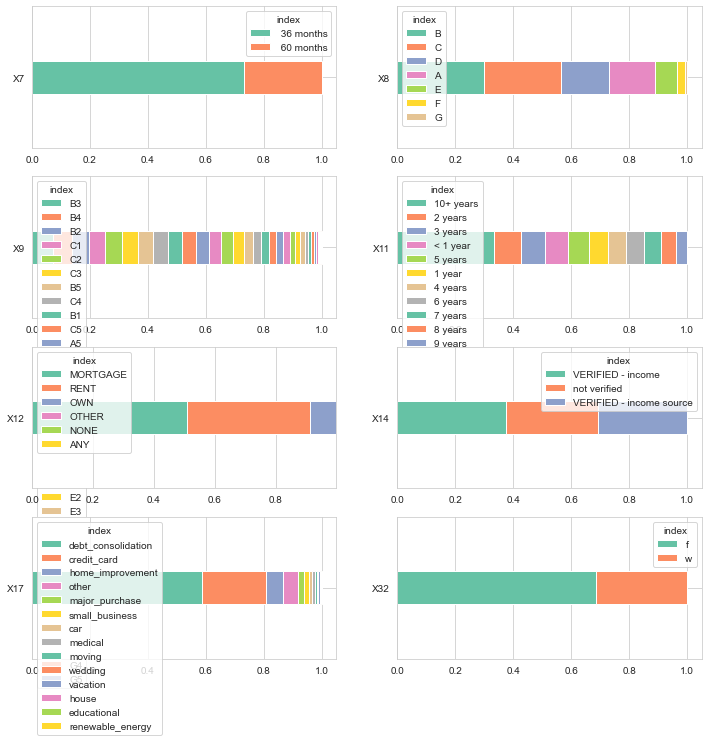

In [133]:
multiple_eda_categorical(df, categorical)


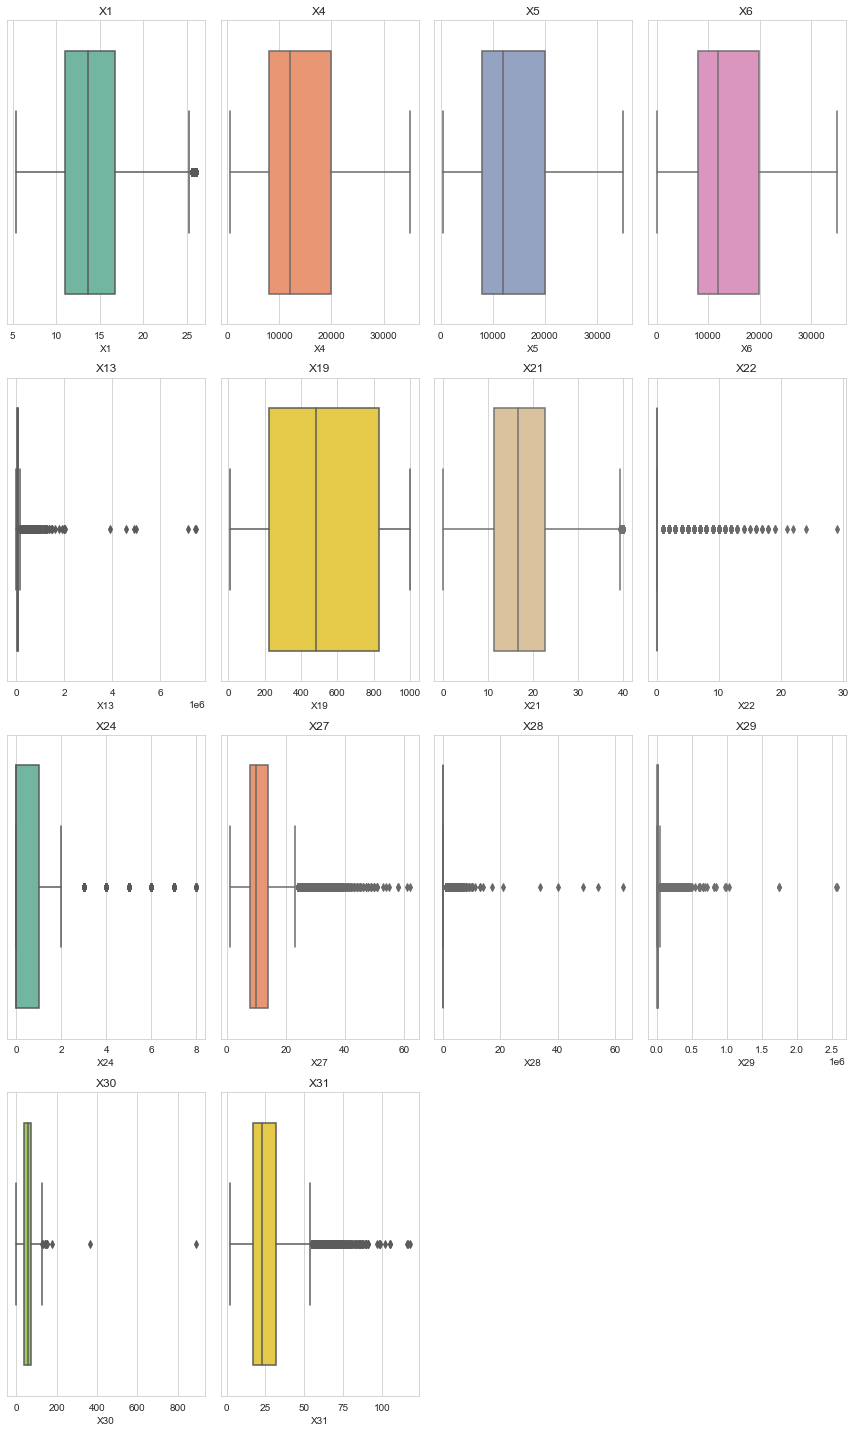

In [134]:
multiple_eda_continuous(df, continuous)


In [135]:
# Encoding 
LE = LabelEncoder()
for i in categorical:
    df[i] = df[i].fillna('Missing')
    df[i] = LE.fit_transform(df[i])

In [136]:
categorical

['X7', 'X8', 'X9', 'X11', 'X12', 'X14', 'X17', 'X32']

In [137]:
LE = LabelEncoder()
for i in categorical:
    test_df[i] = test_df[i].fillna('Missing')
    test_df[i] = LE.fit_transform(test_df[i])

In [138]:
df.head()

,X1,X4,X5,X6,X7,X8,X9,X11,X12,X13,X14,X17,X19,X21,X22,X24,X27,X28,X29,X30,X31,X32
0,11.89,"25,000.00","25,000.00","19,080.00",0,1,8,10,6,"85,000.00",0,2,941,19.48,0.00,0.00,10.00,0.00,"28,854.00",52.10,42.00,0
1,10.71,"7,000.00","7,000.00",673.00,0,1,9,10,6,"65,000.00",2,1,112,14.29,0.00,0.00,7.00,0.00,"33,623.00",76.70,7.00,0
2,16.99,"25,000.00","25,000.00","24,725.00",0,3,17,0,6,"70,000.00",0,2,100,10.50,0.00,0.00,10.00,0.00,"19,878.00",66.30,17.00,0
3,13.11,"1,200.00","1,200.00","1,200.00",0,2,11,1,5,"54,000.00",2,2,777,5.47,0.00,0.00,5.00,0.00,"2,584.00",40.40,31.00,0
4,13.57,"10,800.00","10,800.00","10,692.00",0,2,12,6,6,"32,000.00",2,2,67,11.63,0.00,1.00,14.00,0.00,"3,511.00",25.60,40.00,0


In [139]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      0 non-null      float64
 1   X4      80000 non-null  float64
 2   X5      80000 non-null  float64
 3   X6      80000 non-null  float64
 4   X7      80000 non-null  int64  
 5   X8      80000 non-null  int64  
 6   X9      80000 non-null  int64  
 7   X11     80000 non-null  int64  
 8   X12     80000 non-null  int64  
 9   X13     80000 non-null  float64
 10  X14     80000 non-null  int64  
 11  X17     80000 non-null  int64  
 12  X19     80000 non-null  int64  
 13  X21     80000 non-null  float64
 14  X22     80000 non-null  int64  
 15  X24     80000 non-null  int64  
 16  X27     80000 non-null  int64  
 17  X28     80000 non-null  int64  
 18  X29     80000 non-null  int64  
 19  X30     79970 non-null  float64
 20  X31     80000 non-null  int64  
 21  X32     80000 non-null  int64  
dty

In [140]:
test_df['X30'].fillna(value=test_df['X30'].mean(), inplace=True)

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
target = df['X1']
predictor = df.iloc[:,1:]

In [143]:
target.head()

0   11.89
1   10.71
2   16.99
3   13.11
4   13.57
Name: X1, dtype: float64

In [144]:
x_train, x_test, y_train, y_test = train_test_split(predictor,target,test_size=0.2)
# Splitting the data in 80:20 ratio

In [145]:
from sklearn.linear_model import LinearRegression, RidgeCV
lr = LinearRegression()

In [146]:
lr.fit(x_train,y_train)

LinearRegression()

In [147]:
y_pred = lr.predict(predictor)

In [148]:
from sklearn.metrics import mean_squared_error

In [149]:
print('RMSE on test data: ', np.sqrt(mean_squared_error(target, y_pred)))

RMSE on test data:  2.9112109092864005


In [150]:
from sklearn.metrics import r2_score

In [151]:
r2_score(target,y_pred)

0.5584461191228033

In [152]:
ridge = RidgeCV(cv=10)
ridge.fit(x_train, y_train)
ridge.alpha_

0.1

In [153]:
y_pred = ridge.predict(x_test)
# print RMSE of training predictions
print('RMSE on training data: ', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE on training data:  2.9163750524849


In [154]:
r2_score(y_test,y_pred)

0.5556795197733484

In [155]:
params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,50,100,500]}

In [156]:
from sklearn.linear_model import Ridge 
from sklearn.model_selection import GridSearchCV

In [157]:
ridge = Ridge()

In [158]:
ridge_regressor = GridSearchCV(ridge,params,scoring = 'neg_mean_squared_error',cv=5)

In [159]:
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 50, 100, 500]},
             scoring='neg_mean_squared_error')

In [160]:
print(ridge_regressor.best_params_,ridge_regressor.best_score_)

{'alpha': 1e-10} -8.477734245247067


In [161]:
y_pred = ridge_regressor.predict(x_test)

In [162]:
r2_score(y_test,y_pred)

0.5556795303965669

In [163]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [164]:
regr = RandomForestRegressor(random_state=0)
regr.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [165]:
y_pred = regr.predict(x_test)

In [166]:
r2_score(y_test,y_pred)

0.899881919086178

In [167]:
print('RMSE on training data: ', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE on training data:  1.384367728618272


In [168]:
import pickle

In [169]:
filename = 'random_forest_model_baseline.sav'
pickle.dump(regr, open(filename, 'wb'))

In [172]:
from xgboost.sklearn import XGBRegressor

In [173]:
xgb1 = XGBRegressor()

In [174]:
xgb1.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [175]:
y_pred = regr.predict(x_test)

In [176]:
r2_score(y_test,y_pred)

0.899881919086178

In [177]:
filename = 'XGBoost_model_baseline.sav'
pickle.dump(xgb1, open(filename, 'wb'))

In [178]:
parameters = {
              'learning_rate': [.1, 0.5], #so called `eta` value
              'max_depth': [5,7],
              'n_estimators': [75,125]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = 4,
                        verbose=True)

In [179]:
xgb_grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:  3.6min finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0, gpu_id=-1,
                                    grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat_threshold=64, max_cat_to_onehot=4,
                                    max_delta_step=0, max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constrain

In [180]:
y_pred = xgb_grid.predict(x_test)

In [181]:
print('RMSE on training data: ', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE on training data:  1.3287875098495314


In [182]:
r2_score(y_test,y_pred)

0.9077597105119574

In [183]:
filename = 'XGBoost_model_CV.sav'
pickle.dump(xgb_grid, open(filename, 'wb'))

In [184]:
xgb_grid = pickle.load(open('XGBoost_model_CV.sav', 'rb'))

In [185]:
test_df['X1'] = xgb_grid.predict(test_df.drop('X1',axis=1))

In [186]:
test_df.head()

,X1,X4,X5,X6,X7,X8,X9,X11,X12,X13,X14,X17,X19,X21,X22,X24,X27,X28,X29,X30,X31,X32
0,16.51,"6,000.00","6,000.00","6,000.00",0,2,14,1,0,"68,000.00",0,2,430,28.31,0,1,18,0,19861,64.50,33,0
1,6.05,"24,000.00","24,000.00","24,000.00",0,0,0,8,2,"110,480.00",0,2,945,16.03,0,1,12,0,17001,26.20,36,1
2,14.00,"35,000.00","35,000.00","35,000.00",0,2,11,1,0,"86,000.00",0,2,195,32.49,0,0,16,0,25797,49.90,33,1
3,16.03,"10,000.00","10,000.00","10,000.00",1,3,15,1,2,"30,000.00",1,2,921,32.96,0,1,13,1,9586,43.80,21,1
4,9.61,"24,000.00","24,000.00","24,000.00",1,1,5,1,0,"82,500.00",0,2,196,31.03,0,0,27,0,31842,41.30,43,1


In [187]:
test1_df = pd.read_csv('./Holdout for Testing.csv')

In [188]:
test1_df['X1'] = test_df['X1']

In [189]:
test1_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,16.51,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,10+ years,MORTGAGE,"68,000.00",VERIFIED - income,15-Mar,NaN,debt_consolidation,Debt consolidation,430xx,OH,28.31,0,2-Nov,1,26.00,NaN,18,0,19861,64.50%,33,f
1,6.05,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,8 years,RENT,"110,480.00",VERIFIED - income,15-Mar,NaN,debt_consolidation,Debt consolidation,945xx,CA,16.03,0,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,14.00,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,10+ years,MORTGAGE,"86,000.00",VERIFIED - income,15-Mar,NaN,debt_consolidation,Debt consolidation,195xx,PA,32.49,0,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,16.03,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,10+ years,RENT,"30,000.00",VERIFIED - income source,15-Mar,NaN,debt_consolidation,Debt consolidation,921xx,CA,32.96,0,Feb-99,1,NaN,114.00,13,1,9586,43.80%,21,w
4,9.61,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,10+ years,MORTGAGE,"82,500.00",VERIFIED - income,15-Mar,NaN,debt_consolidation,Debt consolidation,196xx,PA,31.03,0,2-Dec,0,48.00,NaN,27,0,31842,41.30%,43,w


In [190]:
test1_df.to_csv('Results from kargil.csv', encoding='utf-8', index=False)